In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from scipy.stats import *
import random

# Bayes' theorem
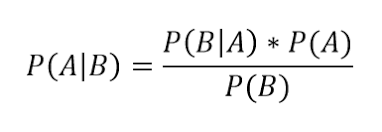

## Task 5 Conditional probability (Titanic)
Download data from $titanic.csv$, limited to the folowing parameters: $'PassengerId','Survived','Pclass','Sex'$

1. Write in P_fem the probability that a random passenger on the Titanic is a woman.
2. Write in P_1class the probability that a random Titanic passenger was traveling in first class.
3. Write in P_surv the probability that a random passenger on the Titanic survived.
4. Write in P_fem_surv the probability that the passenger is a woman and that the passenger survived the crash at the same time.
5. Find the conditional probability that the passenger will survive if the passenger is a woman.
6. By analogy, find the probability that the passenger will survive if the passenger was traveling in first class.
7. Find the probability that the passenger will survive, provided that the passenger was traveling in first class and is a woman.
8. Find the probability that the passenger will survive, provided that the passenger was traveling in second class and is a man.
9. Using the calculated probabilities, find the probability that a randomly selected passenger is a woman if we know that the passenger survived.
10. Using the calculated probabilities, find the probability that a randomly selected passenger was traveling in first class if we know that the passenger survived.
11. Compare the obtained probabilities with the unconditional probabilities of the corresponding events. Explain the difference in meanings.

In [2]:
titanic = pd.read_csv("data/train.csv")
X = titanic[['PassengerId','Survived','Pclass','Sex']]
X.head(2)

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female


In [3]:
# 1. Write in P_fem the probability that a random passenger on the Titanic is a woman.
P_fem = len (X[X.Sex=='female']) / len (X)
P_fem

0.35241301907968575

In [4]:
# 2. Write in P_1class the probability that a random Titanic passenger was traveling in first class.
P_1class = len (X[X.Pclass==1]) / len (X)
P_1class

0.24242424242424243

In [5]:
# 3. Write in P_surv the probability that a random passenger on the Titanic survived.
P_surv = len (X[X.Survived==1]) / len (X)
P_surv

0.3838383838383838

In [6]:
# 4. Write in P_fem_surv the probability that the passenger is a woman 
# and that the passenger survived the crash at the same time.
P_fem_surv = len (X[(X.Survived==1) & (X.Sex=='female')]) / len (X)
P_fem_surv

0.2615039281705948

In [53]:
# 5. Find the conditional probability that the passenger will survive if the passenger is a woman.
P_cond_surv_fem = P_fem_surv / P_fem
P_cond_surv_fem

0.7420382165605095

In [7]:
# 6. By analogy, find the probability that the passenger will survive 
# if the passenger was traveling in first class.
P_1class_surv = len (X[(X.Survived==1) & (X.Pclass==1)]) / len (X)
P_cond_surv_1class = P_1class_surv / P_1class
P_cond_surv_1class

0.6296296296296297

In [8]:
# 7. Find the probability that the passenger will survive, 
# provided that the passenger was traveling in first class and is a woman.
P_surv_1class_fem = len (X[(X.Sex=='female') & (X.Pclass==1) & (X.Survived==1)]) / len (X)
P_1class_fem = len (X[(X.Sex=='female') & (X.Pclass==1)]) / len (X)
P_cond_surv_1class_fem = P_surv_1class_fem / P_1class_fem
P_cond_surv_1class_fem

0.9680851063829786

In [9]:
# 8. Find the probability that the passenger will survive, 
# provided that the passenger was traveling in second class and is a man.
P_surv_2class_male = len (X[(X.Sex=='male') & (X.Pclass==2) & (X.Survived==1)]) / len (X)
P_2class_male = len (X[(X.Sex=='male') & (X.Pclass==2)]) / len (X)
P_cond_surv_2class_male = P_surv_2class_male / P_2class_male
P_cond_surv_2class_male

0.1574074074074074

In [10]:
# 9. Using the calculated probabilities, find the probability that a randomly selected passenger 
# is a woman if we know that the passenger survived.
P_cond_fem_surv = P_fem_surv / P_surv
P_cond_fem_surv

0.6812865497076023

In [11]:
# 10. Using the calculated probabilities, find the probability that a randomly selected passenger 
# was traveling in first class if we know that the passenger survived.
P_cond_1class_1class = P_1class_surv / P_surv
P_cond_1class_1class

0.3976608187134503

In [12]:
# 11. Compare the obtained probabilities with the unconditional probabilities of the corresponding events. 
# Explain the difference in meanings.
print ('(hypothesis) If events occur in a single space of elementary outcomes, then the a posteriori probability will be higher than the a priori one, because the event that separates them narrows the space of outcomes, while the number of successful outcomes remains the same. Thus in a single space of elementary outcomes, all conditional probabilities will be higher than the corresponding unconditional ones.')

(hypothesis) If events occur in a single space of elementary outcomes, then the a posteriori probability will be higher than the a priori one, because the event that separates them narrows the space of outcomes, while the number of successful outcomes remains the same. Thus in a single space of elementary outcomes, all conditional probabilities will be higher than the corresponding unconditional ones.


## Task 6 Conditional probability (Spam)
Download data from $letters.xlsx$ 
- The `spam` column indicates whether a message is spam or not, 
- The `spam_words` - whether it contains words  usual for spam messages.

1. Determine the ratio of spam emails to the total number of emails.
2. Determine the ratio of emails that contain words similar to spam to the total number of emails.
3. Determine the likelihood that an email contains spam-like words, given that it is classified as spam.
4. Determine the likelihood that an email is classified as spam given that it contains spam-like words.

In [13]:
df = pd.read_excel('data/letters.xlsx', sheet_name='Sheet1', index_col='id_letter')
df.head(2)

,spam,spam_words
id_letter,,
1,да,нет
2,да,да


In [14]:
# 1. Determine the ratio of spam emails to the total number of emails.
P_spam_letters = len (df[df.spam == 'да']) / len (df)
P_spam_letters

0.3548387096774194

In [15]:
# 2. Determine the ratio of emails that contain words similar to spam to the total number of emails.
P_letters_with_spam_words = len (df[df.spam_words == 'да']) / len (df)
P_letters_with_spam_words

0.375

In [16]:
# 3. Determine the probability that an email contains spam-like words, given that it is classified as spam.
P_spam_letters_with_spam_words = len (df[(df.spam_words == 'да') & (df.spam == 'да')]) / len (df)
P_cond_spam_words_in_spam_letters = P_spam_letters_with_spam_words / P_spam_letters
P_cond_spam_words_in_spam_letters

0.3636363636363636

In [17]:
# 4. Determine the probability that an email is classified as spam given that it contains spam-like words.
P_cond_spam_letters_with_spam_words = P_spam_letters_with_spam_words / P_letters_with_spam_words
P_cond_spam_letters_with_spam_words

0.3440860215053763